In [1]:
from scipy.io import arff
import numpy as np
import pandas as pd
import requests
from matplotlib import pyplot as plt

import plotly.express as px
from plotly import graph_objects as go
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

%matplotlib inline
pd.options.display.float_format = "{:,.3f}".format
init_notebook_mode(connected=True)
cf.go_offline(connected=True)
cf.set_config_file(theme="pearl")

In [2]:
df = pd.read_csv('1year.arff', skiprows=69, names = ["X"+str(i) for i in range(1, 66)])

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.122,0.39718,0.878,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.121,0.42002,0.853,0,4.1486,3.2732,107.350,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.241,0.81774,0.766,0.69484,4.9909,3.951,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054,0.14207,0.946,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.135,0.48431,0.865,0.12444,6.3985,4.3158,127.210,2.8692,7.898,0


# Data Set Information:

The dataset is about bankruptcy prediction of Polish companies. The data was collected from Emerging Markets Information Service (EMIS, [Web Link]), which is a database containing information on emerging markets around the world. The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.
Basing on the collected data five classification cases were distinguished, that depends on the forecasting period:
- 1stYear â€“ the data contains financial rates from 1st year of the forecasting period and corresponding class label that indicates bankruptcy status after 5 years. The data contains 7027 instances (financial statements), 271 represents bankrupted companies, 6756 firms that did not bankrupt in the forecasting period.

## Attribute Information:

- X1 net profit / total assets
- X2 total liabilities / total assets
- X3 working capital / total assets
- X4 current assets / short-term liabilities
- X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
- X6 retained earnings / total assets
- X7 EBIT / total assets
- X8 book value of equity / total liabilities
- X9 sales / total assets
- X10 equity / total assets
- X11 (gross profit + extraordinary items + financial expenses) / total assets
- X12 gross profit / short-term liabilities
- X13 (gross profit + depreciation) / sales
- X14 (gross profit + interest) / total assets
- X15 (total liabilities * 365) / (gross profit + depreciation)
- X16 (gross profit + depreciation) / total liabilities
- X17 total assets / total liabilities
- X18 gross profit / total assets
- X19 gross profit / sales
- X20 (inventory * 365) / sales
- X21 sales (n) / sales (n-1)
- X22 profit on operating activities / total assets
- X23 net profit / sales
- X24 gross profit (in 3 years) / total assets
- X25 (equity - share capital) / total assets
- X26 (net profit + depreciation) / total liabilities
- X27 profit on operating activities / financial expenses
- X28 working capital / fixed assets
- X29 logarithm of total assets
- X30 (total liabilities - cash) / sales
- X31 (gross profit + interest) / sales
- X32 (current liabilities * 365) / cost of products sold
- X33 operating expenses / short-term liabilities
- X34 operating expenses / total liabilities
- X35 profit on sales / total assets
- X36 total sales / total assets
- X37 (current assets - inventories) / long-term liabilities
- X38 constant capital / total assets
- X39 profit on sales / sales
- X40 (current assets - inventory - receivables) / short-term liabilities
- X41 total liabilities / ((profit on operating activities + depreciation) * (12/365))
- X42 profit on operating activities / sales
- X43 rotation receivables + inventory turnover in days
- X44 (receivables * 365) / sales
- X45 net profit / inventory
- X46 (current assets - inventory) / short-term liabilities
- X47 (inventory * 365) / cost of products sold
- X48 EBITDA (profit on operating activities - depreciation) / total assets
- X49 EBITDA (profit on operating activities - depreciation) / sales
- X50 current assets / total liabilities
- X51 short-term liabilities / total assets
- X52 (short-term liabilities * 365) / cost of products sold)
- X53 equity / fixed assets
- X54 constant capital / fixed assets
- X55 working capital
- X56 (sales - cost of products sold) / sales
- X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
- X58 total costs /total sales
- X59 long-term liabilities / equity
- X60 sales / inventory
- X61 sales / receivables
- X62 (short-term liabilities *365) / sales
- X63 sales / short-term liabilities
- X64 sales / fixed assets

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      7027 non-null   object 
 1   X2      7027 non-null   object 
 2   X3      7027 non-null   object 
 3   X4      7027 non-null   object 
 4   X5      7027 non-null   object 
 5   X6      7027 non-null   object 
 6   X7      7027 non-null   object 
 7   X8      7027 non-null   object 
 8   X9      7027 non-null   object 
 9   X10     7027 non-null   object 
 10  X11     7027 non-null   object 
 11  X12     7027 non-null   object 
 12  X13     7027 non-null   float64
 13  X14     7027 non-null   object 
 14  X15     7027 non-null   object 
 15  X16     7027 non-null   object 
 16  X17     7027 non-null   object 
 17  X18     7027 non-null   object 
 18  X19     7027 non-null   float64
 19  X20     7027 non-null   float64
 20  X21     7027 non-null   object 
 21  X22     7027 non-null   object 
 22  

In [5]:
zero_values = df[df==0].count().sum()

In [6]:
zero_values

7773

In [7]:
que_mark = df.replace("?", np.NaN)
df_clean1 = que_mark.replace(",","")

In [8]:
df_clean = df_clean1.astype("float64")

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      7024 non-null   float64
 1   X2      7024 non-null   float64
 2   X3      7024 non-null   float64
 3   X4      6997 non-null   float64
 4   X5      7019 non-null   float64
 5   X6      7024 non-null   float64
 6   X7      7024 non-null   float64
 7   X8      7002 non-null   float64
 8   X9      7026 non-null   float64
 9   X10     7024 non-null   float64
 10  X11     6988 non-null   float64
 11  X12     6997 non-null   float64
 12  X13     7027 non-null   float64
 13  X14     7024 non-null   float64
 14  X15     7025 non-null   float64
 15  X16     7002 non-null   float64
 16  X17     7002 non-null   float64
 17  X18     7024 non-null   float64
 18  X19     7027 non-null   float64
 19  X20     7027 non-null   float64
 20  X21     5405 non-null   float64
 21  X22     7024 non-null   float64
 22  

In [10]:
df_clean.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65
0,0.201,0.380,0.396,2.047,32.351,0.388,0.250,1.331,1.139,0.505,...,0.122,0.397,0.878,0.002,8.416,5.137,82.658,4.416,7.428,0.000
1,0.209,0.500,0.472,1.945,14.786,0.000,0.258,0.996,1.700,0.498,...,0.121,0.420,0.853,0.000,4.149,3.273,107.350,3.400,60.987,0.000
2,0.249,0.696,0.267,1.555,-1.152,0.000,0.309,0.437,1.309,0.304,...,0.241,0.818,0.766,0.695,4.991,3.951,134.270,2.719,5.208,0.000
3,0.081,0.307,0.459,2.493,51.952,0.150,0.093,1.866,1.057,0.574,...,0.054,0.142,0.946,0.000,4.575,3.615,86.435,4.223,5.550,0.000
4,0.187,0.613,0.230,1.406,-7.313,0.187,0.187,0.631,1.156,0.387,...,0.135,0.484,0.865,0.124,6.399,4.316,127.210,2.869,7.898,0.000


In [11]:
px.box(df_clean["X1"], range_y=(-1,1),title = "Ratio for Net-Profit and Total Assests", labels={"variable":"Ratio"})

In [12]:
max_values=df_clean.max()

In [13]:
a = list(max_values)

In [14]:
b = df_clean.max()
b

X1            94.280
X2           441.500
X3             1.000
X4         1,017.800
X5       990,900.000
           ...      
X61       21,110.000
X62   25,016,000.000
X63        1,042.200
X64      294,770.000
X65            1.000
Length: 65, dtype: float64

In [15]:
df_clean.X5.iplot(kind="box", yTitle = "Values", xTitle="[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365", title = "Box plot")


In [16]:
df_clean[(df_clean>15000) | (df_clean<(-10000))].count().sum()

1525

In [17]:
clean_data = df_clean[(df_clean<2000) & (df_clean>(-2000))]

In the clean data we have set the range from 2000 to -2000 to omit the unreasonable value present in original dataframe. Some column require special treatment for setting the range which was analyse separately below.

In [18]:
clean_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65
0,0.201,0.380,0.396,2.047,32.351,0.388,0.250,1.331,1.139,0.505,...,0.122,0.397,0.878,0.002,8.416,5.137,82.658,4.416,7.428,0.000
1,0.209,0.500,0.472,1.945,14.786,0.000,0.258,0.996,1.700,0.498,...,0.121,0.420,0.853,0.000,4.149,3.273,107.350,3.400,60.987,0.000
2,0.249,0.696,0.267,1.555,-1.152,0.000,0.309,0.437,1.309,0.304,...,0.241,0.818,0.766,0.695,4.991,3.951,134.270,2.719,5.208,0.000
3,0.081,0.307,0.459,2.493,51.952,0.150,0.093,1.866,1.057,0.574,...,0.054,0.142,0.946,0.000,4.575,3.615,86.435,4.223,5.550,0.000
4,0.187,0.613,0.230,1.406,-7.313,0.187,0.187,0.631,1.156,0.387,...,0.135,0.484,0.865,0.124,6.399,4.316,127.210,2.869,7.898,0.000


In [19]:
clean_data.min()

X1      -256.890
X2       -72.162
X3      -440.500
X4         0.000
X5    -1,980.900
         ...    
X61        0.000
X62        0.000
X63        0.000
X64        0.000
X65        0.000
Length: 65, dtype: float64

In [20]:
clean_data.max()

X1       94.280
X2      441.500
X3        1.000
X4    1,017.800
X5    1,920.100
         ...   
X61   1,451.500
X62   1,963.100
X63   1,042.200
X64   1,986.600
X65       1.000
Length: 65, dtype: float64

The attributes are in ratio except column X55 which refers the working capital. To prevent the data loss while setting the range, we separate it with the actual data and see the information. From the working capital column, we found that the median of working capital is around 1604.8. Further boxplot reveals working capitals within the range of 15000 to -10000. Except those the others are considered to be the outliers. 

In [21]:
df_clean["X55"].median()

1604.8

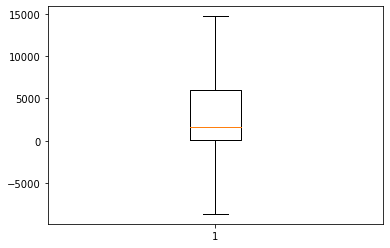

In [22]:
plt.boxplot(df_clean["X55"], showfliers=False);

Below box plot is for $\ (sales - `cost \ of  \ products \ sold`) \ / \ sales \ $ which is in column name X56. These above and below boxplots shows how the data are distributed between one of the highest and lowest value column.

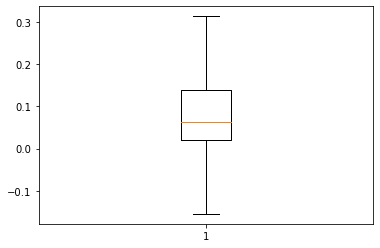

In [23]:
plt.boxplot(df_clean["X56"],showfliers=False);

On getting the summary of the clean data. Those summary are still in large quantity to take the information from. So, concerning this fact we have decided to take some few important column for analysing purpose. Below table reveals the summary of clean data

In [24]:
clean_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65
count,"7,024.000","7,024.000","7,024.000","6,997.000","6,853.000","7,024.000","7,024.000","7,002.000","7,021.000","7,024.000",...,"7,026.000","7,026.000","7,026.000","7,026.000","6,866.000","7,002.000","7,004.000","6,997.000","6,962.000","7,027.000"
mean,0.035,0.560,0.120,2.629,-2.232,0.060,0.314,2.624,2.993,1.826,...,-0.017,0.193,1.021,0.278,31.932,11.660,91.348,8.127,17.773,0.039
std,4.566,5.350,5.275,13.257,229.500,6.051,8.353,18.708,32.858,33.836,...,8.391,4.344,8.394,6.339,117.487,38.850,108.404,19.996,75.500,0.193
min,-256.890,-72.162,-440.500,0.000,"-1,980.900",-397.890,-189.560,-141.410,0.000,-440.550,...,-701.630,-315.370,-0.004,-327.970,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.021,0.297,0.027,1.063,-43.029,0.000,0.028,0.446,1.037,0.301,...,0.020,0.057,0.865,0.000,5.917,4.828,43.178,3.425,2.524,0.000
50%,0.076,0.483,0.181,1.502,-5.119,0.000,0.090,1.015,1.205,0.492,...,0.063,0.176,0.939,0.028,10.017,7.030,68.261,5.303,4.615,0.000
75%,0.160,0.680,0.363,2.461,36.796,0.147,0.189,2.268,2.132,0.676,...,0.138,0.352,0.982,0.274,19.951,10.700,105.913,8.358,9.656,0.000
max,94.280,441.500,1.000,"1,017.800","1,920.100",303.670,453.770,"1,452.200","1,701.400","1,099.500",...,1.000,126.670,702.630,119.580,"1,909.000","1,451.500","1,963.100","1,042.200","1,986.600",1.000


# Analysing
This analysis was performed to see the difference between tidy and untidy data.

## number of bankrupty company

In [25]:
c = clean_data.groupby("X65").count().X1.rename({0:"Not bankrupt", 1:"Bankrupted"})

In [26]:
c.iplot(kind="bar",title="Number of bankrupted and Not bankrupted",xTitle="Status", yTitle="Frequency" )

## Min/Max Ratio

In [27]:
clean_data.agg([np.min,np.max]).T.iplot(kind="bar", title = "Min/Max for each Attributes After cleaning data", xTitle="Ratio",
                                       yTitle="Value")

The difference between the clean data and raw data can be seen in the above chart. This chart gives much clear vision of minimum and maximum value for the entrire column

## Selected column Analysis
We have selected the few columns out of 65 columns to work with. 

In [28]:
liquidity = clean_data[["X4","X40","X46"]]
leverage = clean_data[["X2", "X59"]]
efficiency = clean_data[["X9", "X47"]]
profitability = clean_data[["X1", "X19", "X42"]]

In [29]:
selected_data = liquidity.join((leverage, efficiency, profitability,clean_data["X65"]))

In [30]:
selected_data.head()

,X4,X40,X46,X2,X59,X9,X47,X1,X19,X42,X65
0,2.047,0.663,1.522,0.380,0.002,1.139,49.394,0.201,0.149,0.128,0.000
1,1.945,0.086,1.125,0.500,0.000,1.700,100.130,0.209,0.152,0.146,0.000
2,1.555,0.322,1.010,0.696,0.695,1.309,96.372,0.249,0.236,0.231,0.000
3,2.493,0.401,1.570,0.307,0.000,1.057,84.344,0.081,0.071,0.089,0.000
4,1.406,0.293,0.958,0.613,0.124,1.156,65.936,0.187,0.116,0.122,0.000


In [31]:
selected_data = selected_data.rename(columns = {"X4":"current ratio", "X46":"quick ratio", "X40": "cash ratio", 
                 "X2": "debt ratio", "X59": "LT-debt/equity",
                 "X9":"Asset turnover ratio", "X47": "Days sales in inventory ratio", 
                 "X1": "ROA", "X19": "gross margin ratio", "X42":"operating margin ratio", "X65":"bankrupt status"})

In [32]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   current ratio                  6997 non-null   float64
 1   cash ratio                     6997 non-null   float64
 2   quick ratio                    6996 non-null   float64
 3   debt ratio                     7024 non-null   float64
 4   LT-debt/equity                 7026 non-null   float64
 5   Asset turnover ratio           7021 non-null   float64
 6   Days sales in inventory ratio  6983 non-null   float64
 7   ROA                            7024 non-null   float64
 8   gross margin ratio             7026 non-null   float64
 9   operating margin ratio         7026 non-null   float64
 10  bankrupt status                7027 non-null   float64
dtypes: float64(11)
memory usage: 604.0 KB


In [33]:
selected_data.describe()

,current ratio,cash ratio,quick ratio,debt ratio,LT-debt/equity,Asset turnover ratio,Days sales in inventory ratio,ROA,gross margin ratio,operating margin ratio,bankrupt status
count,"6,997.000","6,997.000","6,996.000","7,024.000","7,026.000","7,021.000","6,983.000","7,024.000","7,026.000","7,026.000","7,027.000"
mean,2.629,0.826,1.853,0.560,0.278,2.993,53.562,0.035,0.155,-0.043,0.039
std,13.257,12.595,12.882,5.350,6.339,32.858,64.965,4.566,16.655,8.417,0.193
min,0.000,-101.270,-101.260,-72.162,-327.970,0.000,0.000,-256.890,-622.060,-701.630,0.000
25%,1.063,0.052,0.610,0.297,0.000,1.037,18.257,0.021,0.015,0.012,0.000
50%,1.502,0.157,0.965,0.483,0.028,1.205,39.043,0.076,0.050,0.048,0.000
75%,2.461,0.517,1.654,0.680,0.274,2.132,68.536,0.160,0.104,0.102,0.000
max,"1,017.800","1,014.600","1,017.800",441.500,119.580,"1,701.400","1,501.300",94.280,"1,246.400",31.690,1.000


### Liquidity mean ratio for clean data
From the figure below we can find that there is no difference between tidy selected data over untidy selected data for the liquidity mean ratio.

In [34]:
a = selected_data.groupby("bankrupt status").mean().iloc[:,:3]
a.T.rename({0:"not bankrupt", 1:'bankrupted'},axis=1).iplot(kind='bar', title = "Average of each liquidity ratio based on group",
       xTitle = 'Liquidity Ratio', yTitle="value")

### Leverage mean ratio
Comparing tidy and untidy data, we can see that there is no difference in the result. The debt ratio and debt equity ratio for non-bankrupt and bankrupt is exactly equal to that of untidy data.

In [35]:
b = selected_data.groupby("bankrupt status").mean().iloc[:,3:5]
b.T.rename({0:"not bankrupt", 1:'bankrupted'}, axis=1).iplot(kind='bar', title = "Average of each leverage5 ratio based on group",
       xTitle = 'Leverage Ratio', yTitle="value")

### Efficiency ratio mean
Efficiency mean ratio of tidy data is different to that of untidy data. It is found that for the tidy data asset turnover ratio is drop by 2.66 for not bankrupt companies. Similarly, drop by the value 34,52725 for the not bankrupt companies can be experience in days sales in inventory ratio. Below figure shows, the graph for Efficiency ratio mean. 

In [36]:
c = selected_data.groupby("bankrupt status").mean().iloc[:,5:7].T.rename({0:"not bankrupt", 1:'bankrupted'}, axis=1)
c.iplot(kind='bar', title = "Average of each efficiency ratio based on group",
       xTitle = 'Efficiency Ratio', yTitle="value")

### Mean of profitability ratio
Working with the mean of profitability ratio with tidy data, it is experience that ROA(Return of Assets) for the not-bankrupt and bankrupt was around 0.044 and -0.20 respectively. Similarly, change to gross margin also seen during the process. It seems like, gross margin ratio for not-bankrupt companies will be 0.17 and gross margin ratio for bankrupt companies will be -0.21. For operating margin ratio, the result is opposite for not bankrupt companies. It seems like operating margin ratio will be -0.04 for not-bankrupt companies after 5 years. However the value of operating margin ratio for bankrupt companies remain same for tidy and untidy data. 

In [37]:
d = selected_data.groupby("bankrupt status").mean().iloc[:,7:].T.rename({0:"not bankrupt", 1:'bankrupted'}, axis=1)
d.iplot(kind='bar', title = "Average of each profitability ratio based on group",
       xTitle = 'Profitability Ratio', yTitle="value")